In [320]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from math import log, floor, exp
import random

random.seed(int("54e22d", 16))

In [321]:
def lag(lag, npseries):
    lagged = npseries[lag:]
    return lagged, npseries[:-lag]

def computeLogReturns(back, ahead):
    return np.divide(back, ahead).map(log)

## Problem 1

In [322]:
GSPCdata = pd.read_csv('./data/GSPC_historical_prices.csv')

Lag1T, Lag1TLagged = lag(1, GSPCdata['Close'])
logReturns = computeLogReturns(Lag1T, Lag1TLagged)
lag1LogReturns, Lag1LogReturnsLagged = lag(1, logReturns)

volatility = vsquare(logReturns)

lag1Volatility, lag1VolatilityLagged = lag(1, volatility)
lag2Volatility, lag2VolatilityLagged = lag(2, volatility)
lag3Volatility, lag3VolatilityLagged = lag(3, volatility)
lag4Volatility, lag4VolatilityLagged = lag(4, volatility)

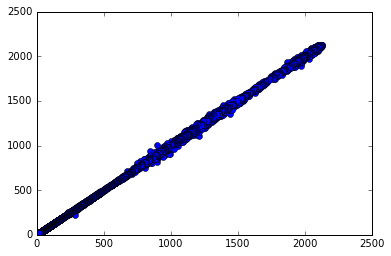

In [323]:
plt.plot(Lag1T, Lag1TLagged, marker='o')

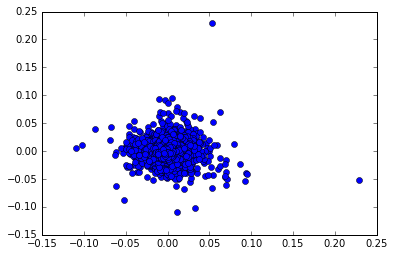

In [324]:
plt.plot(lag1LogReturns, Lag1LogReturnsLagged, marker='o', linestyle="None")

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.01183804, -0.00683518,  0.01074347, -0.01705555, -0.00519965,
        -0.01156974, -0.00554538,  0.00151137, -0.04048092,  0.0287992 ,
         1.        ,  0.0287992 , -0.04048092,  0.00151137, -0.00554538,
        -0.01156974, -0.00519965, -0.01705555,  0.01074347, -0.00683518,
         0.01183804]),
 <matplotlib.lines.Line2D at 0x11a95c810>)

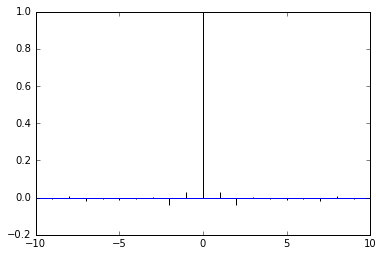

In [325]:
plt.acorr(logReturns)

(array([-10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,  -1,   0,   1,   2,
          3,   4,   5,   6,   7,   8,   9,  10]),
 array([ 0.11382093,  0.13368969,  0.1290324 ,  0.12330546,  0.1315268 ,
         0.21564733,  0.12952158,  0.14282461,  0.23659961,  0.17290662,
         1.        ,  0.17290662,  0.23659961,  0.14282461,  0.12952158,
         0.21564733,  0.1315268 ,  0.12330546,  0.1290324 ,  0.13368969,
         0.11382093]),
 <matplotlib.lines.Line2D at 0x1171bf350>)

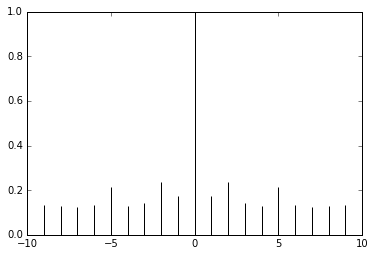

In [326]:
plt.acorr(volatility)

## Problem 2

In [327]:
class RandomWalk:
    def __init__(self):
        self.last = 0

    def __iter__(self):
        return self

    def next(self):
        self.last += random.choice([1, -1])
        return self.last
        
        
def runWalk(steps, walk):
    for step in range(steps):
        walk.next()
    return walk.last

In [335]:
lasts = [runWalk(10000, RandomWalk()) for walk in range(10000)]

(array([   11.,    78.,   470.,  1536.,  2972.,  2807.,  1554.,   494.,
           73.,     5.]),
 array([-396. , -316.6, -237.2, -157.8,  -78.4,    1. ,   80.4,  159.8,
         239.2,  318.6,  398. ]),
 <a list of 10 Patch objects>)

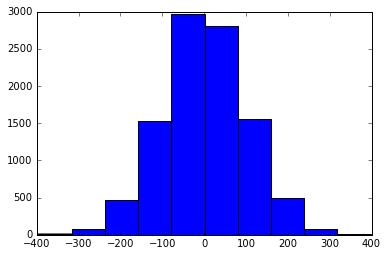

In [336]:
plt.hist(lasts)